<h1>Coursera Capstone Project: Predicting Severity of Car Crashes</h1>

<h5> By Kyla Clark </h5>

This project uses Python to create a Machine Learning (ML) model that is able to predict the severity of car crashes based on different factors/attributes. The factors mainly used include collsion type, weather, road conditions, light conditions, and whether or not the driver was speeding. Using these factors (and more), ML classification models will be trained to predict the severity of car crashes. 


    

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# I. INTRODUCTION

<h3>1.1: Background</h3>
Car collisions occur everyday across the world. These incidents affect not only those involved in the collision, but also those traveling through or near the location at which these collisions occur. Fellow commuters, law enforcement, first responders, and even innocent bystanders can be affected by collisions, so what if there was away to warn commuters of a collision before these commuters reach the location where these incidents occur? What if there was a tool that could warn the likelihood of you getting into a collision and the severity of the collision based on where and when you’re traveling, road conditions, weather, and more. A tool like this could allow driver to re-evaluate their travel plans or make drivers use more caution when driving to help prevent collisions from occurring.

<h3>1.2: Problem</h3>
Data that might contribute to determining severity of collisions might include the type of collision, location of the collision, road conditions, weather conditions, light conditions, and other metrics that would affect the severity of a collision. This project aims to predict the severity of collisions based on different attributes provided by the dataset.

<h3>1.3: Interest</h3>
This project would be of interest to SDOT Traffic Management Division to gain insight on the factors that impact severity of collisions. From this information, the SDOT Traffic Management Division can implement methods to help prevent the number of collisions that occur throughout Seattle. Along with SDOT Traffic Management Division, this tool would be of interest to any commuter in Seattle to make them aware of different conditions that impact the severity of collisions and  instill more caution in Seattle’s commuters when traveling.

# II. DATA

The data file, Data-Collisions.csv, used for this project can be found here:
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

The metadata file associated with the Data-Collisions.csv above can be found here:
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

<h4>Imports:</h4>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
%matplotlib inline

<h2>2.1: Load Data</h2>

In [4]:
data_url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(data_url)
df.head()

/Users/kylaclark/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
#Size and data types of data frame:
print(df.dtypes)
print("\nSize: ", df.shape)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
# Find missing values/null data:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

<h4>Data frame statisitcs:<h4>

In [7]:
df.describe(include = "all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


<h2>2.2: Clean Data</h2>

In [8]:
# removing null values
df_clean = df[['OBJECTID','INCDTTM','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT',
               'VEHCOUNT','SPEEDING','WEATHER','ROADCOND','LIGHTCOND','SEVERITYCODE']].copy(deep = True)
print("Shape before:", df_clean.shape)

# fill NaN values with most frequently occured (mode)
#df_clean['ADDRTYPE'] = df_clean['ADDRTYPE'].fillna(df_clean['ADDRTYPE'].mode().iloc[0])
#df_clean['COLLISIONTYPE'] = df_clean['COLLISIONTYPE'].fillna(df_clean['COLLISIONTYPE'].mode().iloc[0])
#df_clean['WEATHER'] = df_clean['WEATHER'].fillna(df_clean['WEATHER'].mode().iloc[0])
#df_clean['ROADCOND'] = df_clean['ROADCOND'].fillna(df_clean['ROADCOND'].mode().iloc[0])
#df_clean['LIGHTCOND'] = df_clean['LIGHTCOND'].fillna(df_clean['LIGHTCOND'].mode().iloc[0])

df_clean = df_clean.dropna(axis = 0, how = 'any', 
                           subset = ['INCDTTM','ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND'])

# fill NaN 'SPEEDING' values with 0 for N (No) and change Y (Yes) to 1
df_clean['SPEEDING'] = df_clean['SPEEDING'].fillna(value = 0)
df_clean['SPEEDING'] = df_clean['SPEEDING'].replace(to_replace = 'Y', value = 1)
df_clean['SPEEDING'] = df_clean['SPEEDING'].astype('int64')

print("\nNumber of null values:\n" + str(df_clean.isnull().sum()))
print("\nShape after:", df_clean.shape)

Shape before: (194673, 13)

Number of null values:
OBJECTID         0
INCDTTM          0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
SPEEDING         0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
SEVERITYCODE     0
dtype: int64

Shape after: (187504, 13)


# III. METHODOLOGY

<h3>3.1: Exploratory Data Analysis (EDA)</h3>

In [9]:
df_clean.describe(include = "all")

,OBJECTID,INCDTTM,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SPEEDING,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
count,187504.000000,187504,187504,187504,187504.000000,187504.000000,187504.000000,187504.000000,187504.000000,187504,187504,187504,187504.000000
unique,NaN,158462,3,10,NaN,NaN,NaN,NaN,NaN,11,9,9,NaN
top,NaN,11/2/2006,Block,Parked Car,NaN,NaN,NaN,NaN,NaN,Clear,Dry,Daylight,NaN
freq,NaN,96,123315,46679,NaN,NaN,NaN,NaN,NaN,110493,123730,115395,NaN
mean,106582.450822,NaN,NaN,NaN,2.463515,0.038453,0.029306,1.970534,0.049412,NaN,NaN,NaN,1.303300
std,62280.438030,NaN,NaN,NaN,1.360033,0.201523,0.169986,0.559415,0.216728,NaN,NaN,NaN,0.459685
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000
25%,52787.750000,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,0.000000,NaN,NaN,NaN,1.000000
50%,103867.500000,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,0.000000,NaN,NaN,NaN,1.000000
75%,159906.250000,NaN,NaN,NaN,3.000000,0.000000,0.000000,2.000000,0.000000,NaN,NaN,NaN,2.000000


<h4>Evaluate 'SEVERITYCODE' distibution:</h4>

1    130634
2     56870
Name: SEVERITYCODE, dtype: int64

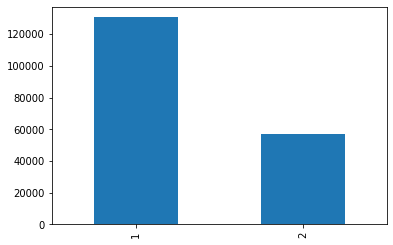

In [10]:
df_clean['SEVERITYCODE'].value_counts().plot(kind='bar')
df_clean['SEVERITYCODE'].value_counts()

The bar chart above shows that most collisions resulted in property damage as opposed to injury.
<table style="width:50%">
    <tr>
        <th>SEVERITYCODE</th>
        <th>CODE MEANING</th>
        <th>NUMBER OF CASES</th>
    </tr>
    <tr>
        <td>1</td>
        <td>property damage</td>
        <td>136485</td>
    </tr>
    <tr>
        <td>2</td>
        <td>injury</td>
        <td>58188</td>
    </tr>                 
</table>

In [11]:
df_clean.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts()

SEVERITYCODE  ROADCOND      
1             Dry               83832
              Wet               31521
              Unknown           13276
              Ice                 923
              Snow/Slush          827
              Other                82
              Standing Water       82
              Sand/Mud/Dirt        51
              Oil                  40
2             Dry               39898
              Wet               15692
              Unknown             729
              Ice                 269
              Snow/Slush          165
              Other                42
              Standing Water       29
              Oil                  24
              Sand/Mud/Dirt        22
Name: ROADCOND, dtype: int64

<b>'GOOD'</b>: Dry
<br><b>'BAD'</b>: Ice, Oil, Other, Sand/Mud/Dirt, Snow/Slush, Standing Water, Unknown, Wet
<br><br>
From this observation we can see most collisons occured on <b>Dry</b> and <b>Wet</b> road conditions. Most collsions that resulted in injury occured on <b>Dry</b> road conditions.

In [12]:
df_clean.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts()

SEVERITYCODE  LIGHTCOND               
1             Daylight                    76995
              Dark - Street Lights On     33816
              Unknown                     12008
              Dusk                         3906
              Dawn                         1667
              Dark - No Street Lights      1191
              Dark - Street Lights Off      869
              Other                         175
              Dark - Unknown Lighting         7
2             Daylight                    38400
              Dark - Street Lights On     14417
              Dusk                         1936
              Dawn                          823
              Unknown                       589
              Dark - No Street Lights       334
              Dark - Street Lights Off      315
              Other                          52
              Dark - Unknown Lighting         4
Name: LIGHTCOND, dtype: int64

<b>'GOOD'</b>: Dark - Street Lights On, Dawn, Daylight, Dusk
<br><b>'BAD'</b>: Dark - No Street Lights, Dark - Street Lights Off, Dark - Unknown Lighting, Other, Unknown
<br><br>
From this observation, we can see most collisons occured duirng during the daytime when there was <b>Daylight</b> and <b>Dark - Street Lights On</b>. Most collsions involving injuries occured in <b>Daylight</b>.

In [13]:
df_clean.groupby(['SEVERITYCODE'])['WEATHER'].value_counts()

SEVERITYCODE  WEATHER                 
1             Clear                       74775
              Raining                     21835
              Overcast                    18834
              Unknown                     13267
              Snowing                       729
              Other                         676
              Fog/Smog/Smoke                377
              Sleet/Hail/Freezing Rain       85
              Blowing Sand/Dirt              36
              Severe Crosswind               18
              Partly Cloudy                   2
2             Clear                       35718
              Raining                     11134
              Overcast                     8711
              Unknown                       790
              Fog/Smog/Smoke                186
              Snowing                       167
              Other                         114
              Sleet/Hail/Freezing Rain       27
              Blowing Sand/Dirt              13
 

<b>'GOOD'</b>: Clear, Partly Cloudy
<br><b>'BAD'</b>: Blowing Sand/Dirt, Fog/Smog/Smoke, Other, Overcast, Raining, Severe Crosswind, Sleet/Hail/Freezing Rain, Snowing, Unknown
<br><br>
From this observation, we can see over most collisons occured when the weather was <b>Clear</b> or when it was <b>Raining</b>. Most collisions involving injuries occured when the weather was <b>Clear</b>. 

In [14]:
df_clean.groupby(['SEVERITYCODE'])['COLLISIONTYPE'].value_counts()

SEVERITYCODE  COLLISIONTYPE
1             Parked Car       44031
              Angles           20970
              Rear Ended       19229
              Other            17375
              Sideswipe        15959
              Left Turn         8259
              Right Turn        2331
              Head On           1142
              Pedestrian         670
              Cycles             668
2             Rear Ended       14565
              Angles           13585
              Other             6065
              Pedestrian        5919
              Left Turn         5400
              Cycles            4731
              Parked Car        2648
              Sideswipe         2483
              Head On            869
              Right Turn         605
Name: COLLISIONTYPE, dtype: int64

From this observation, we can see over most collisons types included a <b>Parked Car</b>, <b>Angles</b>, and <b>Rear Ended</b>. Most collisions types involving injuries were <b>Rear Ended</b> or <b>Angles</b>. 

In [15]:
df_clean.groupby(['SEVERITYCODE'])['SPEEDING'].value_counts()

SEVERITYCODE  SPEEDING
1             0           124875
              1             5759
2             0            53364
              1             3506
Name: SPEEDING, dtype: int64

<h4>Collisions per Year by SEVERITY Type Graphs:</h4>

In [16]:
# change time/date format for easy HOUR and YEAR extraction
df_clean['DATETIME'] = df_clean['INCDTTM'].astype('datetime64[ns]')

HOUR  SEVERITYCODE
0     1               21040
      2                8177
1     1                2546
      2                 828
2     1                2695
      2                 862
3     1                1295
      2                 344
4     1                 935
      2                 271
5     1                1164
      2                 483
6     1                2142
      2                1014
7     1                4326
      2                2144
8     1                5785
      2                2667
9     1                5558
      2                2400
10    1                5217
      2                2128
11    1                5729
      2                2387
12    1                7238
      2                2975
13    1                7023
      2                3076
14    1                7155
      2                3352
15    1                7654
      2                3731
16    1                7998
      2                3996
17    1                8307
 

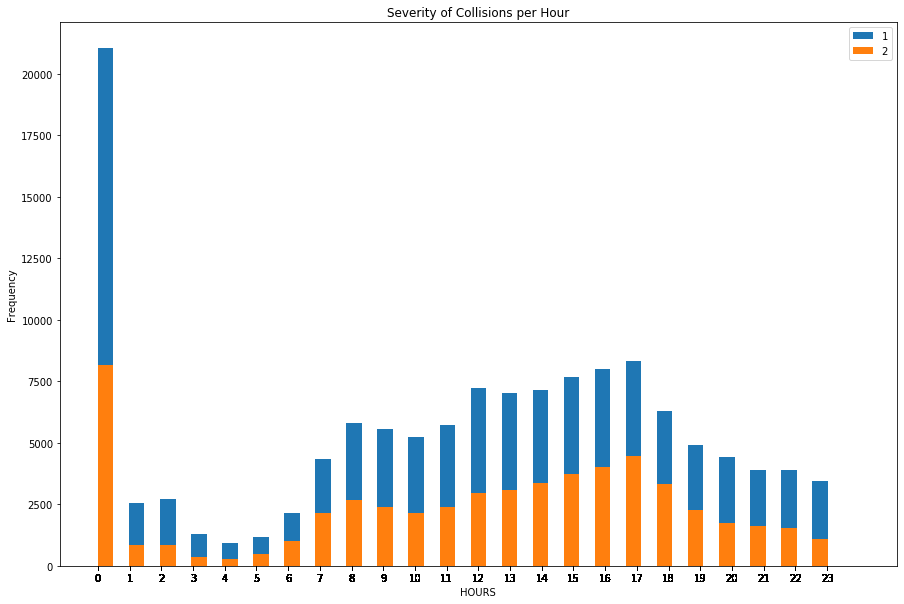

In [17]:
# prep data frame and create histogram for number of COLLISIONS
df_hour = df_clean
df_hour['HOUR'] = df_hour['DATETIME'].dt.hour
print(df_hour.groupby('HOUR')['SEVERITYCODE'].value_counts())

df_hour.groupby('SEVERITYCODE')['HOUR'].plot(kind = 'hist', bins = np.linspace(0,24,50), 
                                             figsize=(15,10), legend=True)
plt.title("Severity of Collisions per Hour")
plt.xticks(df_hour['HOUR'])
plt.xlabel("HOURS")
plt.show()

In [18]:
# prep data frame for Severity of Collisions grouped by Year
df_annual = df_clean.groupby([df_clean.DATETIME.dt.year,'SEVERITYCODE']).size().unstack(fill_value = 0)
df_annual.reset_index(drop = False, inplace = True)
df_annual.columns = ['YEAR', 'PROPERTY', 'INJURY']
df_annual['TOTAL'] = df_annual['PROPERTY'] + df_annual['INJURY']
df_annual.drop(df_annual.tail(1).index, inplace = True)
print(df_annual)

    YEAR  PROPERTY  INJURY  TOTAL
0   2004      8187    3643  11830
1   2005     10604    4439  15043
2   2006     10785    4331  15116
3   2007     10343    3997  14340
4   2008      9740    3737  13477
5   2009      8177    3367  11544
6   2010      7484    3229  10713
7   2011      7694    3092  10786
8   2012      6890    3290  10180
9   2013      6719    3169   9888
10  2014      7974    3383  11357
11  2015      8718    3644  12362
12  2016      7182    3582  10764
13  2017      6991    3356  10347
14  2018      6560    3263   9823
15  2019      5732    2950   8682


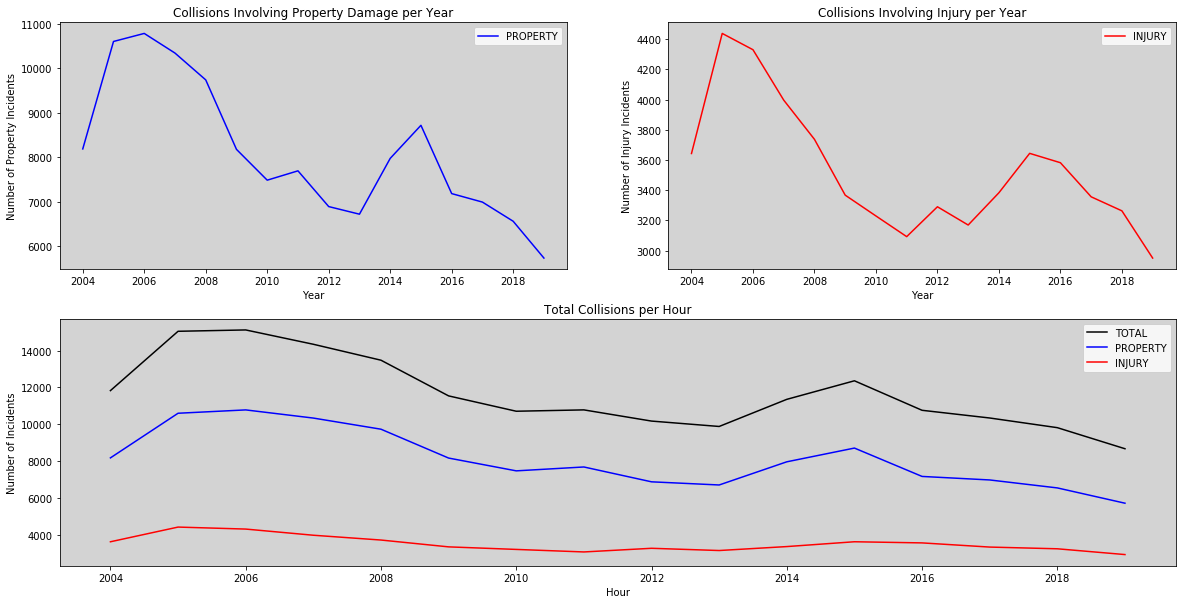

In [19]:
fig = plt.figure(figsize = (20, 10))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(212)

ax0.plot('YEAR', 'PROPERTY', data = df_annual, color = 'blue')
ax0.set(title = "Collisions Involving Property Damage per Year", xlabel = 'Year', ylabel = 'Number of Property Incidents')
ax0.set_facecolor('lightgray')
ax0.legend()

ax1.plot('YEAR', 'INJURY', data = df_annual, color = 'red')
ax1.set(title = "Collisions Involving Injury per Year", xlabel = 'Year', ylabel = 'Number of Injury Incidents')
ax1.set_facecolor('lightgray')
ax1.legend()

ax2.plot('YEAR', 'TOTAL', data = df_annual, color = 'black')
ax2.plot('YEAR', 'PROPERTY', data = df_annual, color = 'blue')
ax2.plot('YEAR', 'INJURY', data = df_annual, color = 'red')
ax2.set(title = "Total Collisions per Hour", xlabel = 'Hour', ylabel = 'Number of Incidents')
ax2.set_facecolor('lightgray')
ax2.legend()

plt.show()

<h4>Collision Bar Charts:</h4>

In [20]:
# create dataframe for 'Collision' bar chart
dataset = df_clean.groupby([df_clean.DATETIME.dt.year,'COLLISIONTYPE']).size().unstack(fill_value = 0)
dataset.reset_index(drop = False, inplace = True)
df_collision = dataset[['DATETIME','Angles','Parked Car','Rear Ended']].copy()
df_collision.rename(columns = {'DATETIME':'YEARS'}, inplace = True)
df_collision.drop(df_collision.tail(1).index, inplace = True)

# create dataframe for 'Light Condition' bar chart
dataset = df_clean.groupby([df_clean.DATETIME.dt.year,'LIGHTCOND']).size().unstack(fill_value = 0)
dataset.reset_index(drop = False, inplace = True)
df_light = dataset[['DATETIME','Daylight','Dark - Street Lights On','Dusk']].copy()
df_light.rename(columns = {'DATETIME':'YEARS'}, inplace = True)
df_light.drop(df_light.tail(1).index, inplace = True)

# create dataframe for 'Road Condition' bar chart
dataset = df_clean.groupby([df_clean.DATETIME.dt.year,'ROADCOND']).size().unstack(fill_value = 0)
dataset.reset_index(drop = False, inplace = True)
df_road = dataset[['DATETIME','Dry','Wet','Unknown']].copy()
df_road.rename(columns = {'DATETIME':'YEARS'}, inplace = True)
df_road.drop(df_road.tail(1).index, inplace = True)

# create dataframe for 'Weather Condition' bar chart
dataset = df_clean.groupby([df_clean.DATETIME.dt.year,'WEATHER']).size().unstack(fill_value = 0)
dataset.reset_index(drop = False, inplace = True)
df_weather = dataset[['DATETIME','Clear','Overcast','Raining']].copy()
df_weather.rename(columns = {'DATETIME':'YEARS'}, inplace = True)
df_weather.drop(df_weather.tail(1).index, inplace = True)

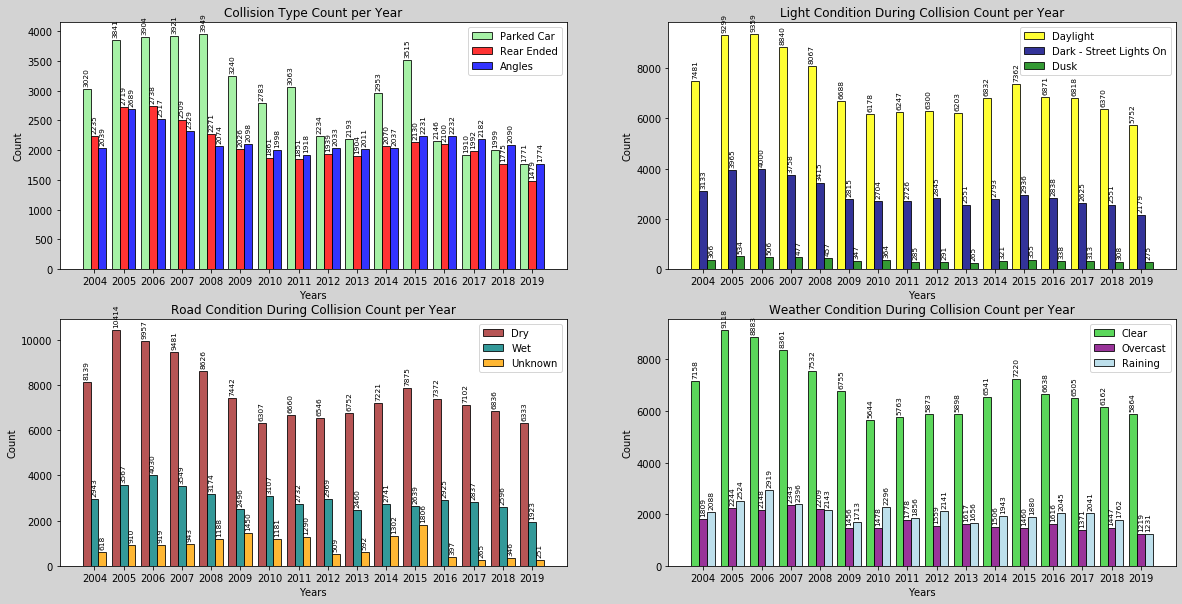

In [21]:
# autolabel function
def autolabel(bars, ax):
    """Attach a text label above each bar in *bars*, displaying its count/height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy = (bar.get_x() + bar.get_width() / 2, height), xytext = (0, 3),  # 3 points vertical offset
                    textcoords = "offset points", ha = 'center', va = 'bottom', rotation = 90, fontsize = 7.5)

# data for bar graph (3 bars)
n_years = 16
years = df_collision['YEARS']

# create graph
fig = plt.figure(figsize = (20,10), facecolor = 'lightgrey')
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
index = np.arange(n_years)
bar_width = 0.27

# create COLLISION bars
parked_bar = ax0.bar(index - bar_width, df_collision['Parked Car'], bar_width, alpha = 0.8, color = 'lightgreen', 
       label = "Parked Car", edgecolor = 'black')
rear_bar = ax0.bar(index, df_collision['Rear Ended'], bar_width, alpha = 0.8, color = 'red', 
       label = "Rear Ended", edgecolor = 'black', tick_label = years)
angle_bar = ax0.bar(index + bar_width, df_collision['Angles'], bar_width, alpha = 0.8, color = 'blue', 
       label = "Angles", edgecolor = 'black')
autolabel(parked_bar, ax0)
autolabel(rear_bar, ax0)
autolabel(angle_bar, ax0)
ax0.set(title = 'Collision Type Count per Year', xlabel = 'Years', ylabel = 'Count')
ax0.legend()

# create LIGHTCOND bars
day_bar = ax1.bar(index - bar_width, df_light['Daylight'], bar_width, alpha = 0.8, color = 'yellow', 
       label = "Daylight", edgecolor = 'black')
dark_bar = ax1.bar(index, df_light['Dark - Street Lights On'], bar_width, alpha = 0.8, color = 'navy', 
       label = "Dark - Street Lights On", edgecolor = 'black', tick_label = years)
dusk_bar = ax1.bar(index + bar_width, df_light['Dusk'], bar_width, alpha = 0.8, color = 'green', 
       label = "Dusk", edgecolor = 'black')
autolabel(day_bar, ax1)
autolabel(dark_bar, ax1)
autolabel(dusk_bar, ax1)
ax1.set(title = 'Light Condition During Collision Count per Year', xlabel = 'Years', ylabel = 'Count')
ax1.legend()

# create ROADCOND bars
dry_bar = ax2.bar(index - bar_width, df_road['Dry'], bar_width, alpha = 0.8, color = 'brown', 
       label = "Dry", edgecolor = 'black')
wet_bar = ax2.bar(index, df_road['Wet'], bar_width, alpha = 0.8, color = 'teal', 
       label = "Wet", edgecolor = 'black', tick_label = years)
unkwn_bar = ax2.bar(index + bar_width, df_road['Unknown'], bar_width, alpha = 0.8, color = 'orange', 
       label = "Unknown", edgecolor = 'black')
autolabel(dry_bar, ax2)
autolabel(wet_bar, ax2)
autolabel(unkwn_bar, ax2)
ax2.set(title = 'Road Condition During Collision Count per Year', xlabel = 'Years', ylabel = 'Count')
ax2.legend()

# create WEATHER bars
clear_bar = ax3.bar(index - bar_width, df_weather['Clear'], bar_width, alpha = 0.8, color = 'limegreen', 
       label = "Clear", edgecolor = 'black')
overcast_bar = ax3.bar(index, df_weather['Overcast'], bar_width, alpha = 0.8, color = 'purple', 
       label = "Overcast", edgecolor = 'black', tick_label = years)
rain_bar = ax3.bar(index + bar_width, df_weather['Raining'], bar_width, alpha = 0.8, color = 'lightblue', 
       label = "Raining", edgecolor = 'black')
autolabel(clear_bar, ax3)
autolabel(overcast_bar, ax3)
autolabel(rain_bar, ax3)
ax3.set(title = 'Weather Condition During Collision Count per Year', xlabel = 'Years', ylabel = 'Count')
ax3.legend()

plt.show()

Now that we have cleansed and explored the data provided in the 'Data-Collisons.csv' file, now let's start building a Machine Learning (ML) model to see if we can successfully predict when collision might occur in Seattle.

<h2>3.2: MODELS</h2>

<h3>3.2.1: Data Preparation/Conversion</h3>

In [66]:
df_model = df_clean
print(df_model.shape)
df_model

(187504, 10)


,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,SPEEDING,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,1,2,2,2,2,0,3,2,1,2
1,2,1,4,2,2,0,2,2,2,1
2,3,1,1,4,3,0,3,1,1,1
3,4,1,5,3,3,0,1,1,1,1
4,5,2,2,2,2,0,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...
194668,219543,1,10,3,2,0,1,1,1,2
194669,219544,1,3,2,2,0,2,2,1,1
194670,219545,2,6,3,2,0,1,1,1,2
194671,219546,2,8,2,1,0,1,1,3,2


<h4>Column Conversion (object to int):</h4>

In [23]:
# Convert 'ADDRTYPE' to int:
df_model['ADDRTYPE'].replace({'Block': 1}, inplace = True)
df_model['ADDRTYPE'].replace({'Intersection': 2}, inplace = True)
df_model['ADDRTYPE'].replace({'Alley': 3}, inplace = True)

In [24]:
print("'ADDRTYPE'\n\nKey:\n1 = Block\n2 = Intersection\n3 = Alley\n\nValue Counts:")
print(df_model['ADDRTYPE'].value_counts())

'ADDRTYPE'

Key:
1 = Block
2 = Intersection
3 = Alley

Value Counts:
1    123315
2     63447
3       742
Name: ADDRTYPE, dtype: int64


In [25]:
# Convert 'COLLISIONTYPE' to int:
df_model['COLLISIONTYPE'].replace({'Unknown': 0}, inplace = True)
df_model['COLLISIONTYPE'].replace({'Parked Car': 1}, inplace = True)
df_model['COLLISIONTYPE'].replace({'Angles': 2}, inplace = True)
df_model['COLLISIONTYPE'].replace({'Rear Ended': 3}, inplace = True)
df_model['COLLISIONTYPE'].replace({'Sideswipe': 4}, inplace = True)
df_model['COLLISIONTYPE'].replace({'Other': 5}, inplace = True)
df_model['COLLISIONTYPE'].replace({'Left Turn': 6}, inplace = True)
df_model['COLLISIONTYPE'].replace({'Pedestrian': 7}, inplace = True)
df_model['COLLISIONTYPE'].replace({'Cycles': 8}, inplace = True)
df_model['COLLISIONTYPE'].replace({'Right Turn': 9}, inplace = True)
df_model['COLLISIONTYPE'].replace({'Head On': 10}, inplace = True)

In [26]:
print("'COLLISIONTYPE'\n\nKey:\n0 = Unknown\n1 = Parked Car\n2 = Angles\n3 = Rear Ended\n4 = Sideswipe" +
      "\n5 = Other\n6 = Left Turn\n7 = Pedestrian\n8 = Cycles\n9 = Right Turn\n10 = Head On\n\nValue Counts:")
print(df_model['COLLISIONTYPE'].value_counts())

'COLLISIONTYPE'

Key:
0 = Unknown
1 = Parked Car
2 = Angles
3 = Rear Ended
4 = Sideswipe
5 = Other
6 = Left Turn = Pedestrian
8 = Cycles
9 = Right Turn
10 = Head On

Value Counts:
1     46679
2     34555
3     33794
5     23440
4     18442
6     13659
7      6589
8      5399
9      2936
10     2011
Name: COLLISIONTYPE, dtype: int64


In [27]:
# Convert 'WEATHER' to int
df_model['WEATHER'].replace({'Unknown': 0}, inplace = True)
df_model['WEATHER'].replace({'Clear': 1}, inplace = True)
df_model['WEATHER'].replace({'Raining': 2}, inplace = True)
df_model['WEATHER'].replace({'Overcast':3}, inplace = True)
df_model['WEATHER'].replace({'Snowing': 4}, inplace = True)
df_model['WEATHER'].replace({'Other': 5}, inplace = True)
df_model['WEATHER'].replace({'Fog/Smog/Smoke': 6}, inplace = True)
df_model['WEATHER'].replace({'Sleet/Hail/Freezing Rain': 7}, inplace = True)
df_model['WEATHER'].replace({'Blowing Sand/Dirt': 8}, inplace = True)
df_model['WEATHER'].replace({'Severe Crosswind': 9}, inplace = True)
df_model['WEATHER'].replace({'Partly Cloudy': 10}, inplace = True)

In [28]:
print("'WEATHER'\n\nKey:\n0 = Unknown\n1 = Clear\n2 = Raining\n3 = Overcast\n4 = Snowing\n5 = Other" +
      "\n6 = Fog/Smog/Smoke\n7 = Sleet/Hail/Freezing Rain\n8 = Blowing Sand/DIrt\n9 = Severe Crosswind" +
      "\n10 = Partly Cloudy\n\nValue Counts:")
print(df_model['WEATHER'].value_counts())

'WEATHER'

Key:
0 = Unknown
1 = Clear
2 = Raining
3 = Overcast
4 = Snowing
5 = Other
6 = Fog/Smog/Smoke
7 = Sleet/Hail/Freezing Rain
8 = Blowing Sand/DIrt
9 = Severe Crosswind
10 = Partly Cloudy

Value Counts:
1     110493
2      32969
3      27545
0      14057
4        896
5        790
6        563
7        112
8         49
9         25
10         5
Name: WEATHER, dtype: int64


In [29]:
# Convert 'ROADCOND' to int:
df_model['ROADCOND'].replace({'Unknown': 0}, inplace = True)
df_model['ROADCOND'].replace({'Dry': 1}, inplace = True)
df_model['ROADCOND'].replace({'Wet': 2}, inplace = True)
df_model['ROADCOND'].replace({'Ice': 3}, inplace = True)
df_model['ROADCOND'].replace({'Snow/Slush': 4}, inplace = True)
df_model['ROADCOND'].replace({'Other': 5}, inplace = True)
df_model['ROADCOND'].replace({'Standing Water': 6}, inplace = True)
df_model['ROADCOND'].replace({'Sand/Mud/Dirt': 7}, inplace = True)
df_model['ROADCOND'].replace({'Oil': 8}, inplace = True)

In [30]:
print("'ROADCOND'\n\nKey:\n0 = Unknown\n1 = Dry\n2 = Wet\n3 = Ice\n4 = Snow/Slush\n5 = Other" +
      "\n6 = Standing Water\n7 = Sand/Mud/Dirt\n8 = Oil\n\nValue Counts:")
print(df_model['ROADCOND'].value_counts())

'ROADCOND'

Key:
0 = Unknown
1 = Dry
2 = Wet
3 = Ice
4 = Snow/Slush
5 = Other
6 = Standing Water
7 = Sand/Mud/Dirt
8 = Oil

Value Counts:
1    123730
2     47213
0     14005
3      1192
4       992
5       124
6       111
7        73
8        64
Name: ROADCOND, dtype: int64


In [31]:
# Convert 'LIGHTCOND' to int:
df_model['LIGHTCOND'].replace({'Unknown': 0}, inplace = True)
df_model['LIGHTCOND'].replace({'Daylight': 1}, inplace = True)
df_model['LIGHTCOND'].replace({'Dark - Street Lights On': 2}, inplace = True)
df_model['LIGHTCOND'].replace({'Dusk': 3}, inplace = True)
df_model['LIGHTCOND'].replace({'Dawn':4}, inplace = True)
df_model['LIGHTCOND'].replace({'Other': 5}, inplace = True)
df_model['LIGHTCOND'].replace({'Dark - No Street Lights': 6}, inplace = True)
df_model['LIGHTCOND'].replace({'Dark - Street Lights Off': 7}, inplace = True)
df_model['LIGHTCOND'].replace({'Dark - Unknown Lighting': 8}, inplace = True)

In [32]:
print("'LIGHTCOND'\n\nKey:\n0 = Unknown\n1 = Daylight\n2 = Dark - Street Lights On\n3 = Dusk\n4 = Dawn" +
      "\n5 = Other\n6 = Dark - No Street Lights \n7 = Dark - Street Lights Off\n8 = Dark - Unknown Lighting" +
      "\n\nValue Counts:")
print(df_model['LIGHTCOND'].value_counts())

'LIGHTCOND'

Key:
0 = Unknown
1 = Daylight
2 = Dark - Street Lights On
3 = Dusk
4 = Dawn
5 = Other
6 = Dark - No Street Lights 
7 = Dark - Street Lights Off
8 = Dark - Unknown Lighting

Value Counts:
1    115395
2     48233
0     12597
3      5842
4      2490
6      1525
7      1184
5       227
8        11
Name: LIGHTCOND, dtype: int64


In [96]:
df_model

,OBJECTID,INCDTTM,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SPEEDING,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEVERITYCODE,DATETIME,HOUR
0,1,3/27/2013 2:54:00 PM,2,2,2,0,0,2,0,3,2,1,10,2,2013-03-27 14:54:00,14
1,2,12/20/2006 6:55:00 PM,1,4,2,0,0,2,0,2,2,2,11,1,2006-12-20 18:55:00,18
2,3,11/18/2004 10:20:00 AM,1,1,4,0,0,3,0,3,1,1,32,1,2004-11-18 10:20:00,10
3,4,3/29/2013 9:26:00 AM,1,5,3,0,0,3,0,1,1,1,23,1,2013-03-29 09:26:00,9
4,5,1/28/2004 8:04:00 AM,2,2,2,0,0,2,0,2,2,1,10,2,2004-01-28 08:04:00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,219543,11/12/2018 8:12:00 AM,1,10,3,0,0,2,0,1,1,1,24,2,2018-11-12 08:12:00,8
194669,219544,12/18/2018 9:14:00 AM,1,3,2,0,0,2,0,2,2,1,13,1,2018-12-18 09:14:00,9
194670,219545,1/19/2019 9:25:00 AM,2,6,3,0,0,2,0,1,1,1,28,2,2019-01-19 09:25:00,9
194671,219546,1/15/2019 4:48:00 PM,2,8,2,0,1,1,0,1,1,3,5,2,2019-01-15 16:48:00,16


<h3>3.2.2: Feature Selection:</h3>

In [43]:
df_model.drop(columns = ['INCDTTM', 'PEDCOUNT', 'PEDCYLCOUNT', 'DATETIME', 'HOUR'], inplace = True)
df_model.groupby('SPEEDING')['SEVERITYCODE'].value_counts()

SPEEDING  SEVERITYCODE
0         1               124875
          2                53364
1         1                 5759
          2                 3506
Name: SEVERITYCODE, dtype: int64

In [44]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [45]:
y = df_model['SEVERITYCODE'].values
print(y.shape)

x = df_model.drop(columns=['SEVERITYCODE'])
x[:1]
print(x.shape)

(187504,)
(187504, 9)


In [46]:
# Seperate attributes
x_add = x['ADDRTYPE'].values
x_col = x['COLLISIONTYPE'].values
x_per = x['PERSONCOUNT'].values
x_veh = x['VEHCOUNT'].values
x_spe = x['SPEEDING'].values
x_wea = x['WEATHER'].values
x_roa = x['ROADCOND'].values
x_lig = x['LIGHTCOND'].values

In [47]:
print("Attributes:", x)
print("\nSeverity Codes:", y)

Attributes:         OBJECTID  ADDRTYPE  COLLISIONTYPE  PERSONCOUNT  VEHCOUNT  SPEEDING  \
0              1         2              2            2         2         0   
1              2         1              4            2         2         0   
2              3         1              1            4         3         0   
3              4         1              5            3         3         0   
4              5         2              2            2         2         0   
...          ...       ...            ...          ...       ...       ...   
194668    219543         1             10            3         2         0   
194669    219544         1              3            2         2         0   
194670    219545         2              6            3         2         0   
194671    219546         2              8            2         1         0   
194672    219547         1              3            2         2         0   

        WEATHER  ROADCOND  LIGHTCOND  
0           

In [48]:
df_model['SEVERITYCODE'].value_counts()

1    130634
2     56870
Name: SEVERITYCODE, dtype: int64

<h3>3.2.3: Machine Learning (ML) Models</h3>

In [67]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

<h4>Functions Defined for ML Model Building:</h4>

In [72]:
def cross_val(model, pred, scores):
    """Mehtod used to train, validate (K-Fold Cross Validation), and predict accuracy of models."""
    for train_index, test_index in validation.split(x):
        # train
        x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
        model.fit(x_train, y_train)
        # predict and calculate accuracy
        pred = model.predict(x_test)
        scores.append(accuracy_score(y_test, pred))
        return scores

def f1(model, string):
    """Method used to find the f1 score of ML models."""
    x_train , x_test , y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 3)
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    f1 = f1_score(y_test, yhat)
    f1_list.append(f1)
    print("F1 score for the", string ,"model:", f1)
    return f1_list

def average(lst, string): 
    """Takes average of accuracy lists."""
    avg = sum(lst) / len(lst)
    accuracy_list.append(avg)
    print("Accuracy for the", string, "model:", avg)    

x = preprocessing.StandardScaler().fit(x).transform(x)
validation = KFold(n_splits = 5, random_state = 1, shuffle = True)
f1_list = []
accuracy_list = []

In [69]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

NameError: name 'x_train' is not defined

<h4>K-Nearest Neighbors</h4>

In [75]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn_cross = []
knn_pred = {}
f1(knn,"K-Nearest Neighbors")
cross_val(knn, knn_pred, knn_score)
average(knn_score, "KNN")

F1 score for the K-Nearest Neighbors model: 0.8082226855408027
Accuracy for the KNN model: 0.7213140982907124


<h4>Decision Tree:</h4>

In [76]:
dtree = DecisionTreeClassifier()
dtree_score = []
dtree_pred = {}
f1(dtree, "Decision Tree")
cross_val(dtree, dtree_pred, dtree_score)
average(dtree_score, "Decsion Tree")

F1 score for the Decision Tree model: 0.7683336210699968
Accuracy for the Decsion Tree model: 0.6821151435961708


<h4>SVM:</h4>

In [77]:
svm = SVC(kernel='linear', C=1, gamma = 'auto')
svm_score = []
svm_pred = {}
f1(svm, "SVM")
cross_val(svm, svm_pred, svm_score)
average(svm_score, "SVM")

F1 score for the SVM model: 0.8234426718120068
Accuracy for the SVM model: 0.6983013786299032


## <h4>Logistic Regression:</h4>

In [78]:
log = LogisticRegression(random_state = 0, solver = 'lbfgs')
log_score = []
log_pred = {}
f1(log, "Logistic Regression")
cross_val(log, log_pred, log_score)
average(log_score, "Logistic Regression")

F1 score for the Logistic Regression model: 0.8207859165917609
Accuracy for the Logistic Regression model: 0.719394149489347


# IV. RESULTS

In [61]:
average(knn_score, "KNN")
average(dtree_score, "Decsion Tree")
average(svm_score, "SVM")
average(log_score, "Logistic Regression")

Accuracy for the KNN model: 0.7213140982907122
Accuracy for the Decsion Tree model: 0.6828617903522572
Accuracy for the SVM model: 0.6983013786299032
Accuracy for the Logistic Regression model: 0.719394149489347


In [63]:
report_cv = pd.DataFrame(data = accuracy_list, index = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'])
report_cv.columns = ['Avg. Accuracy']
print(report_cv)

report_f1 = pd.DataFrame(data = f1_list, index = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'])
report_f1.columns = ['F1 Score']
print("\n", report_f1)

NameError: name 'f1_list' is not defined

# V. DISCUSSION

Many more analysis and methodologies can be added to this project as future work. For example, testing and clustering was not done using any of the location, latitude, adn longitude data points. These features could have been used to determine unforeseen severity clusters based on location. Using location based data to predict severity could improve the study tremendously.

# VI. CONCLUSION

After preparing data, four differnt ML classification models were trained and used to predict the severity of car collsions in Seattle. The K-Nearest Neighbors (KNN) classification model resulted in the highest accuracy in terms of predciting the severity of an accidident based on factors including collision type, number of vehicles involved, weather, road conditions, light conditions, and whether or not speeding was a factor. The KNN model had the highest cross-validation accuracy of <b>72.13%</b> and the SVM model had the highest f1 score of <b>0.8234</b>.

In conclusion, the SVM model should be used to predict severity levels of car collsions to prevent future collsions from occurrig and to bring more awareness to drivers planning on commuting when severity predictions are high.